In [123]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [124]:
train_data= pd.read_csv('D:\\DeepLearning\\CodeAlpha_Project_Name\\CreditScoringTask\\Dataset\\train.csv')
test_data=pd.read_csv('D:\\DeepLearning\\CodeAlpha_Project_Name\\CreditScoringTask\\Dataset\\test.csv')

C:\Users\Shaima\AppData\Local\Temp\ipykernel_9448\2737183949.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data= pd.read_csv('D:\\DeepLearning\\CodeAlpha_Project_Name\\CreditScoringTask\\Dataset\\train.csv')


# Data Preprocessing 

In [125]:
train_data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [126]:
# Deleting (-) and (_) in Column
train_data['Age'] = train_data['Age'].str.replace('-','')
train_data['Age'] = train_data['Age'].str.replace('_','')

train_data['Annual_Income'] = train_data['Annual_Income'].str.replace('-','')
train_data['Annual_Income'] = train_data['Annual_Income'].str.replace('_','')

# Deleting (-) and (_) in Column
train_data['Num_of_Loan'] = train_data['Num_of_Loan'].str.replace('-','')
train_data['Num_of_Loan'] = train_data['Num_of_Loan'].str.replace('_','')

# Deleting (-) and (_) in Column
train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].str.replace('-','')
train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].str.replace('_','0')

# Deleting (-) and (_) in Column
train_data['Outstanding_Debt'] = train_data['Outstanding_Debt'].str.replace('-','')
train_data['Outstanding_Debt'] = train_data['Outstanding_Debt'].str.replace('_','')

# Deleting (-) and (_) in Column
train_data['Monthly_Balance'] = train_data['Monthly_Balance'].str.replace('-','')
train_data['Monthly_Balance'] = train_data['Monthly_Balance'].str.replace('_','')

train_data['Delay_from_due_date']=train_data['Delay_from_due_date'].astype(int)
train_data['Delay_from_due_date']=train_data['Delay_from_due_date'].replace('-','')
# Deleting (-) and (_) in Column
train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].str.replace('-','')
train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].str.replace('_','')

train_data['Amount_invested_monthly'] = train_data['Amount_invested_monthly'].str.replace('-','')
train_data['Amount_invested_monthly'] = train_data['Amount_invested_monthly'].str.replace('_','')


train_data['Credit_Mix'] = train_data['Amount_invested_monthly'].str.replace('-','')
train_data['Credit_Mix'] = train_data['Amount_invested_monthly'].str.replace('_','')

train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].str.replace('!@9#%8','Unknown')
train_data['Occupation']=train_data['Occupation'].str.replace('_______','unknown')

In [127]:
import pandas as pd

# Assuming your DataFrame is named df
# Selecting only numeric columns for simplicity
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the first quartile (Q1) and third quartile (Q3) for all numeric columns
Q1 = train_data[numeric_columns].quantile(0.25)
Q3 = train_data[numeric_columns].quantile(0.75)

# Calculate the interquartile range (IQR) for all numeric columns
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers for all numeric columns
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers for each column
outliers = train_data[(train_data[numeric_columns] < lower_bound) | (train_data[numeric_columns] > upper_bound)].any(axis=1)

# Display outliers
print("Outliers using IQR:")
print(train_data[outliers])

Outliers using IQR:
            ID Customer_ID     Month             Name Age          SSN  \
10      0x1610  CUS_0x21b1     March  Rick Rothackerj  28  004-07-5839   
40      0x163e  CUS_0x95ee   January               Np  31  612-70-8987   
44      0x1642  CUS_0x95ee       May               Np  31  612-70-8987   
45      0x1643  CUS_0x95ee      June               Np  31  612-70-8987   
50      0x164c  CUS_0x284a     March           Nadiaq  34  411-51-0676   
...        ...         ...       ...              ...  ..          ...   
99960  0x25fb6  CUS_0x372c   January  Lucia Mutikanik  18  340-85-7301   
99970  0x25fc4   CUS_0xf16     March   Maria Sheahanb  45  868-70-2218   
99985  0x25fdb  CUS_0x8600  February   Sarah McBridec  28  031-35-0942   
99993  0x25fe7  CUS_0x942c  February            Nicks  25  078-73-5990   
99997  0x25feb  CUS_0x942c      June            Nicks  25  078-73-5990   

          Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
10         

In [128]:
train_data['Age'] = train_data['Age'].astype(int)
train_data['Annual_Income'] = train_data['Annual_Income'].astype(float)
train_data['Num_of_Loan'] = train_data['Num_of_Loan'].astype(int)
train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].astype(float)
train_data['Outstanding_Debt'] = train_data['Outstanding_Debt'].astype(float)
train_data['Monthly_Balance'] = train_data['Monthly_Balance'].astype(float)
train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].astype(float)
train_data['Amount_invested_monthly'] = train_data['Amount_invested_monthly'].astype(float)
train_data['Credit_History_Age'] = train_data['Credit_History_Age'].astype(str)
train_data['Credit_Mix'] = train_data['Credit_Mix'].astype(str)



In [129]:
# Impute outliers with the mean of the respective columns
train_data[numeric_columns] = train_data[numeric_columns].mask(outliers, train_data[numeric_columns].mean(),axis=0)
# Display the DataFrame with imputed outliers
print("DataFrame with imputed outliers:")
print(train_data[numeric_columns])

DataFrame with imputed outliers:
       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                1824.843333                3.0              4.0   
1                        NaN                3.0              4.0   
2                        NaN                3.0              4.0   
3                        NaN                3.0              4.0   
4                1824.843333                3.0              4.0   
...                      ...                ...              ...   
99995            3359.415833                4.0              6.0   
99996            3359.415833                4.0              6.0   
99997                    NaN                NaN              NaN   
99998            3359.415833                4.0              6.0   
99999            3359.415833                4.0              6.0   

       Interest_Rate  Num_Credit_Inquiries  Credit_Utilization_Ratio  \
0                3.0                   4.0                 26.822620   
1     

In [130]:
train_data['Monthly_Inhand_Salary'] = train_data.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.fillna(x.mean()))
train_data['Num_of_Delayed_Payment'] = train_data.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.fillna(x.mean()))
train_data['Credit_History_Age'] = train_data.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x: x.fillna(x.mode().iloc[0]))  # Using iloc[0] to get the first mode if multiple modes exist
train_data['Credit_Mix'] = train_data.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.fillna(x.mode().iloc[0]))

train_data['Amount_invested_monthly'] = train_data.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.fillna(x.mean()))
train_data = train_data.dropna(subset=['Monthly_Balance','Num_Credit_Inquiries','Monthly_Inhand_Salary']) #not a large number from the data so, it could be removed


In [131]:
train_data.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        8081
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                9312
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [132]:
train_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,80.41529543900253,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,118.28022162236736,809.98,31.944960,nan,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,81.699521264648,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,199.4580743910713,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,41.420153086217326,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98297,0x255f7,CUS_0x9d41,February,Rothackerz,38,979-38-2855,Lawyer,41015.55,3152.962500,0.0,...,218.36035428633636,599.40,38.442034,nan,No,25.671257,218.360354,High_spent_Small_value_payments,331.264639,Standard
98298,0x255f8,CUS_0x9d41,March,Rothackerz,38,979-38-2855,Lawyer,41015.55,3152.962500,0.0,...,10000,599.40,30.760830,25 Years and 1 Months,No,25.671257,10000.000000,Low_spent_Small_value_payments,178.327142,Standard
98299,0x255f9,CUS_0x9d41,April,Rothackerz,38,979-38-2855,Lawyer,41015.55,3152.962500,0.0,...,387.5414392986354,599.40,31.936092,25 Years and 2 Months,NM,25.671257,387.541439,Low_spent_Small_value_payments,192.083554,Standard
98301,0x255fb,CUS_0x9d41,June,Rothackerz,38,979-38-2855,Lawyer,41015.55,3152.962500,0.0,...,91.1985864505906,599.40,28.754729,nan,No,25.671257,91.198586,High_spent_Medium_value_payments,448.426407,Standard


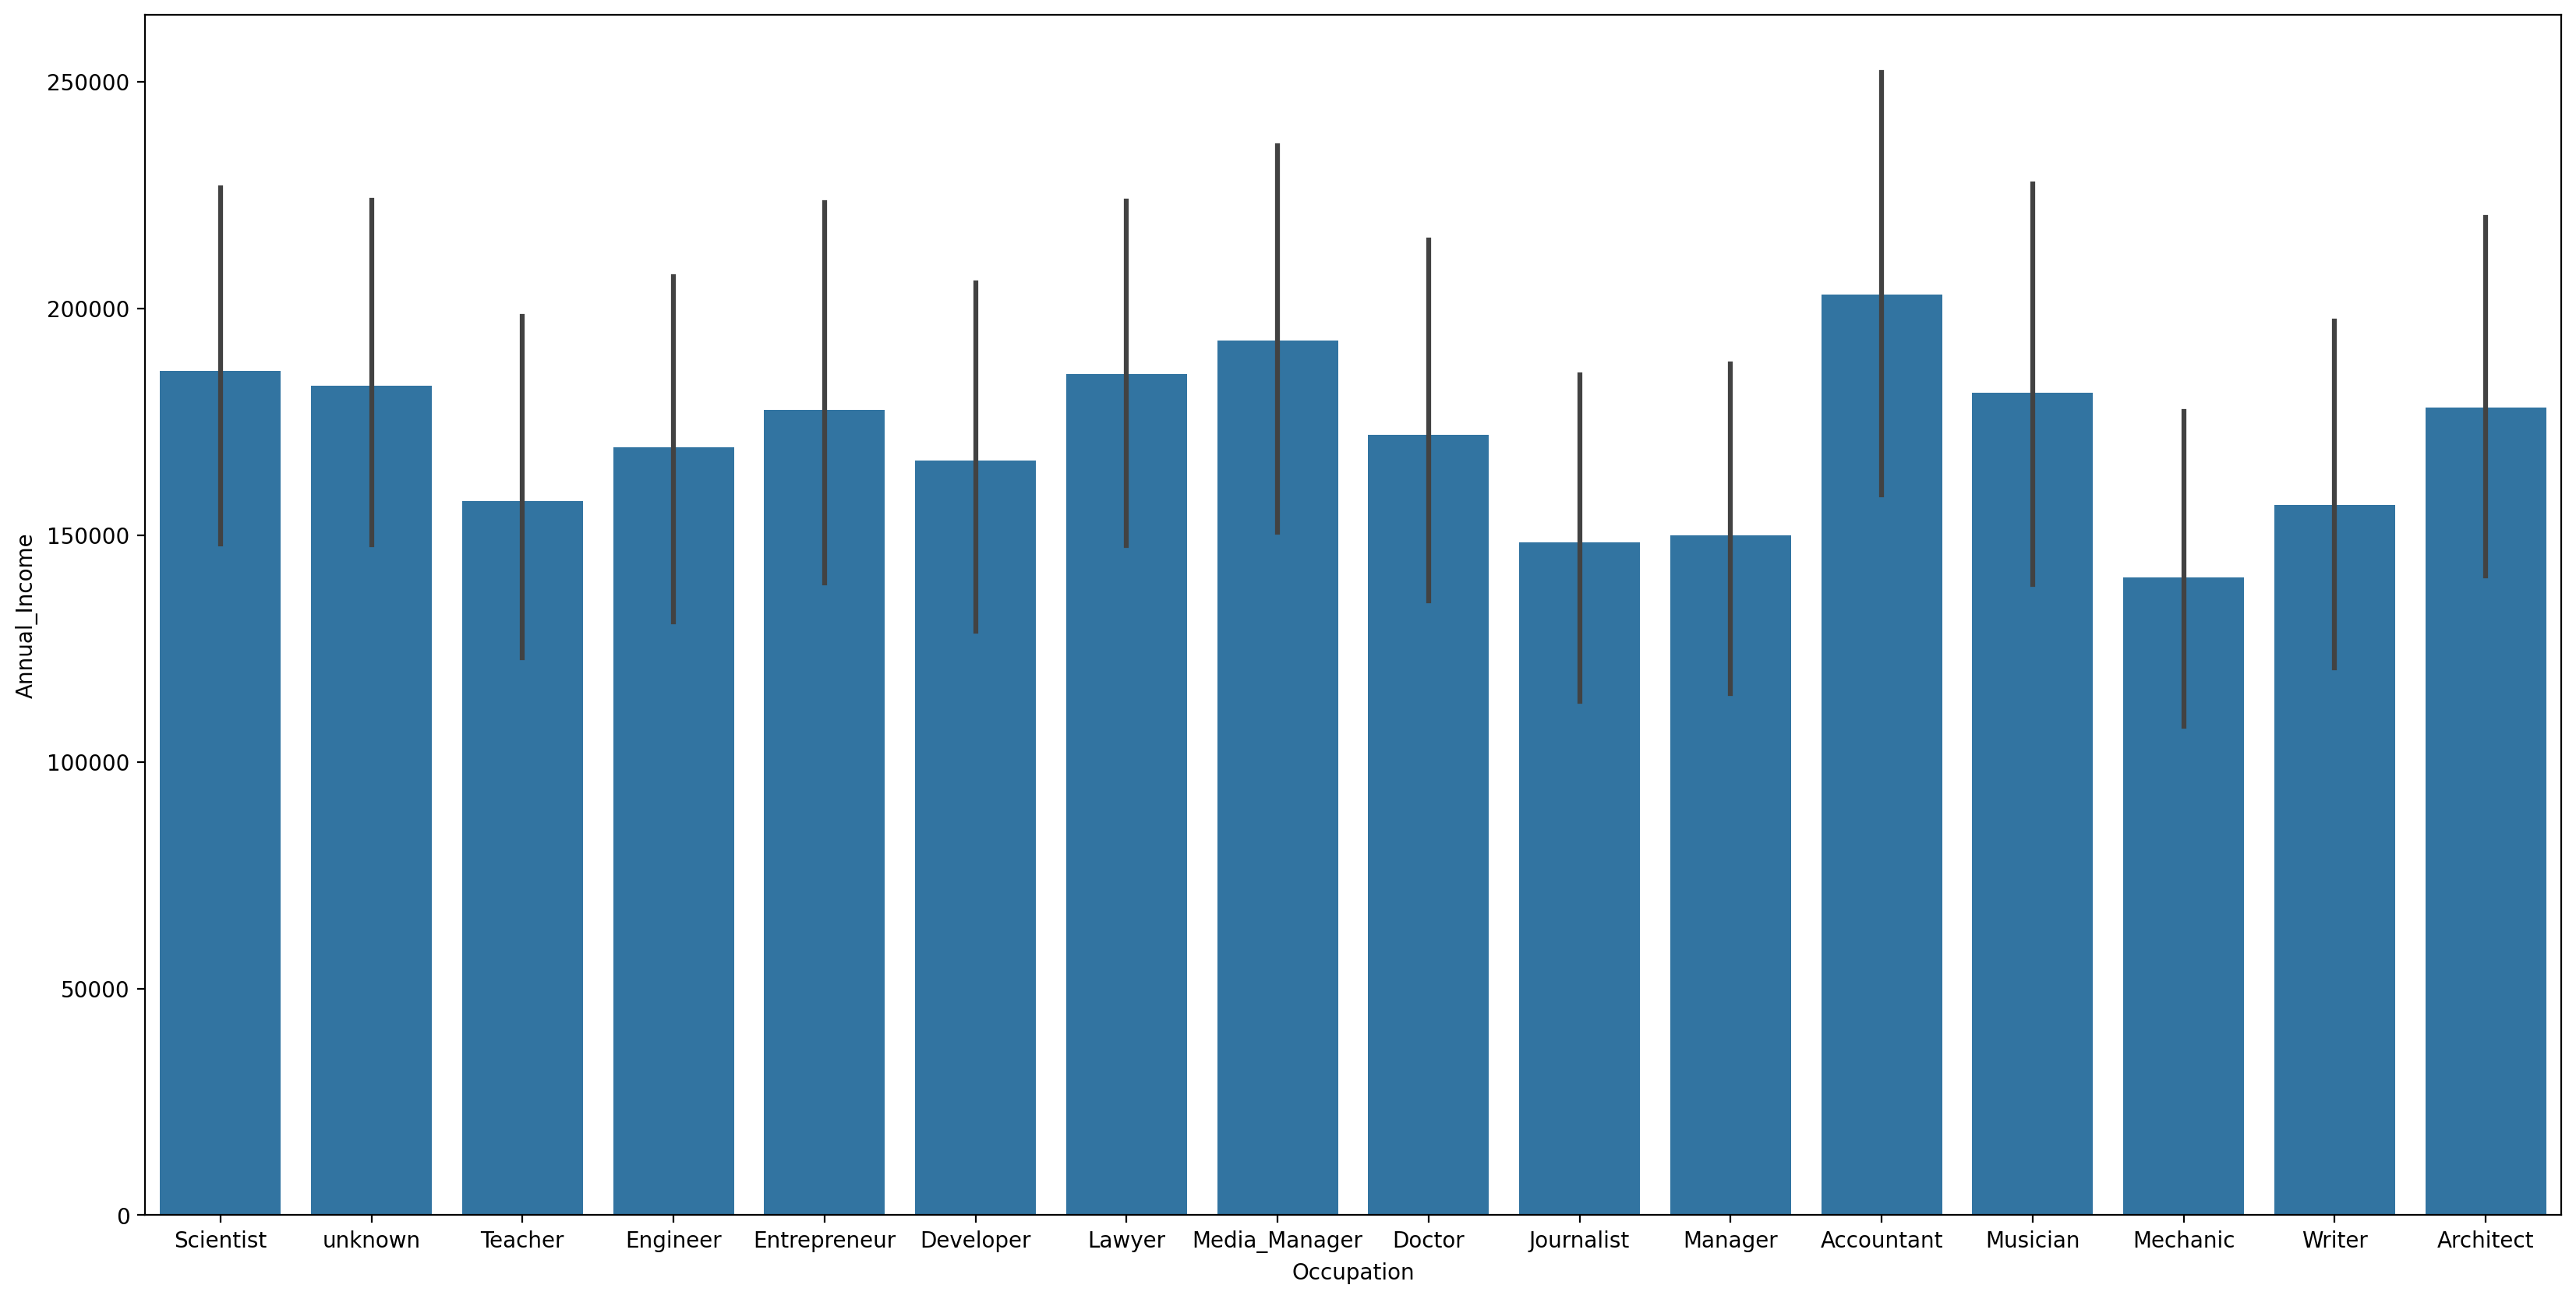

In [133]:
plt.figure(figsize = (20, 10), dpi = 200)
sns.barplot(data = train_data, x = 'Occupation', y = 'Annual_Income')
plt.show()

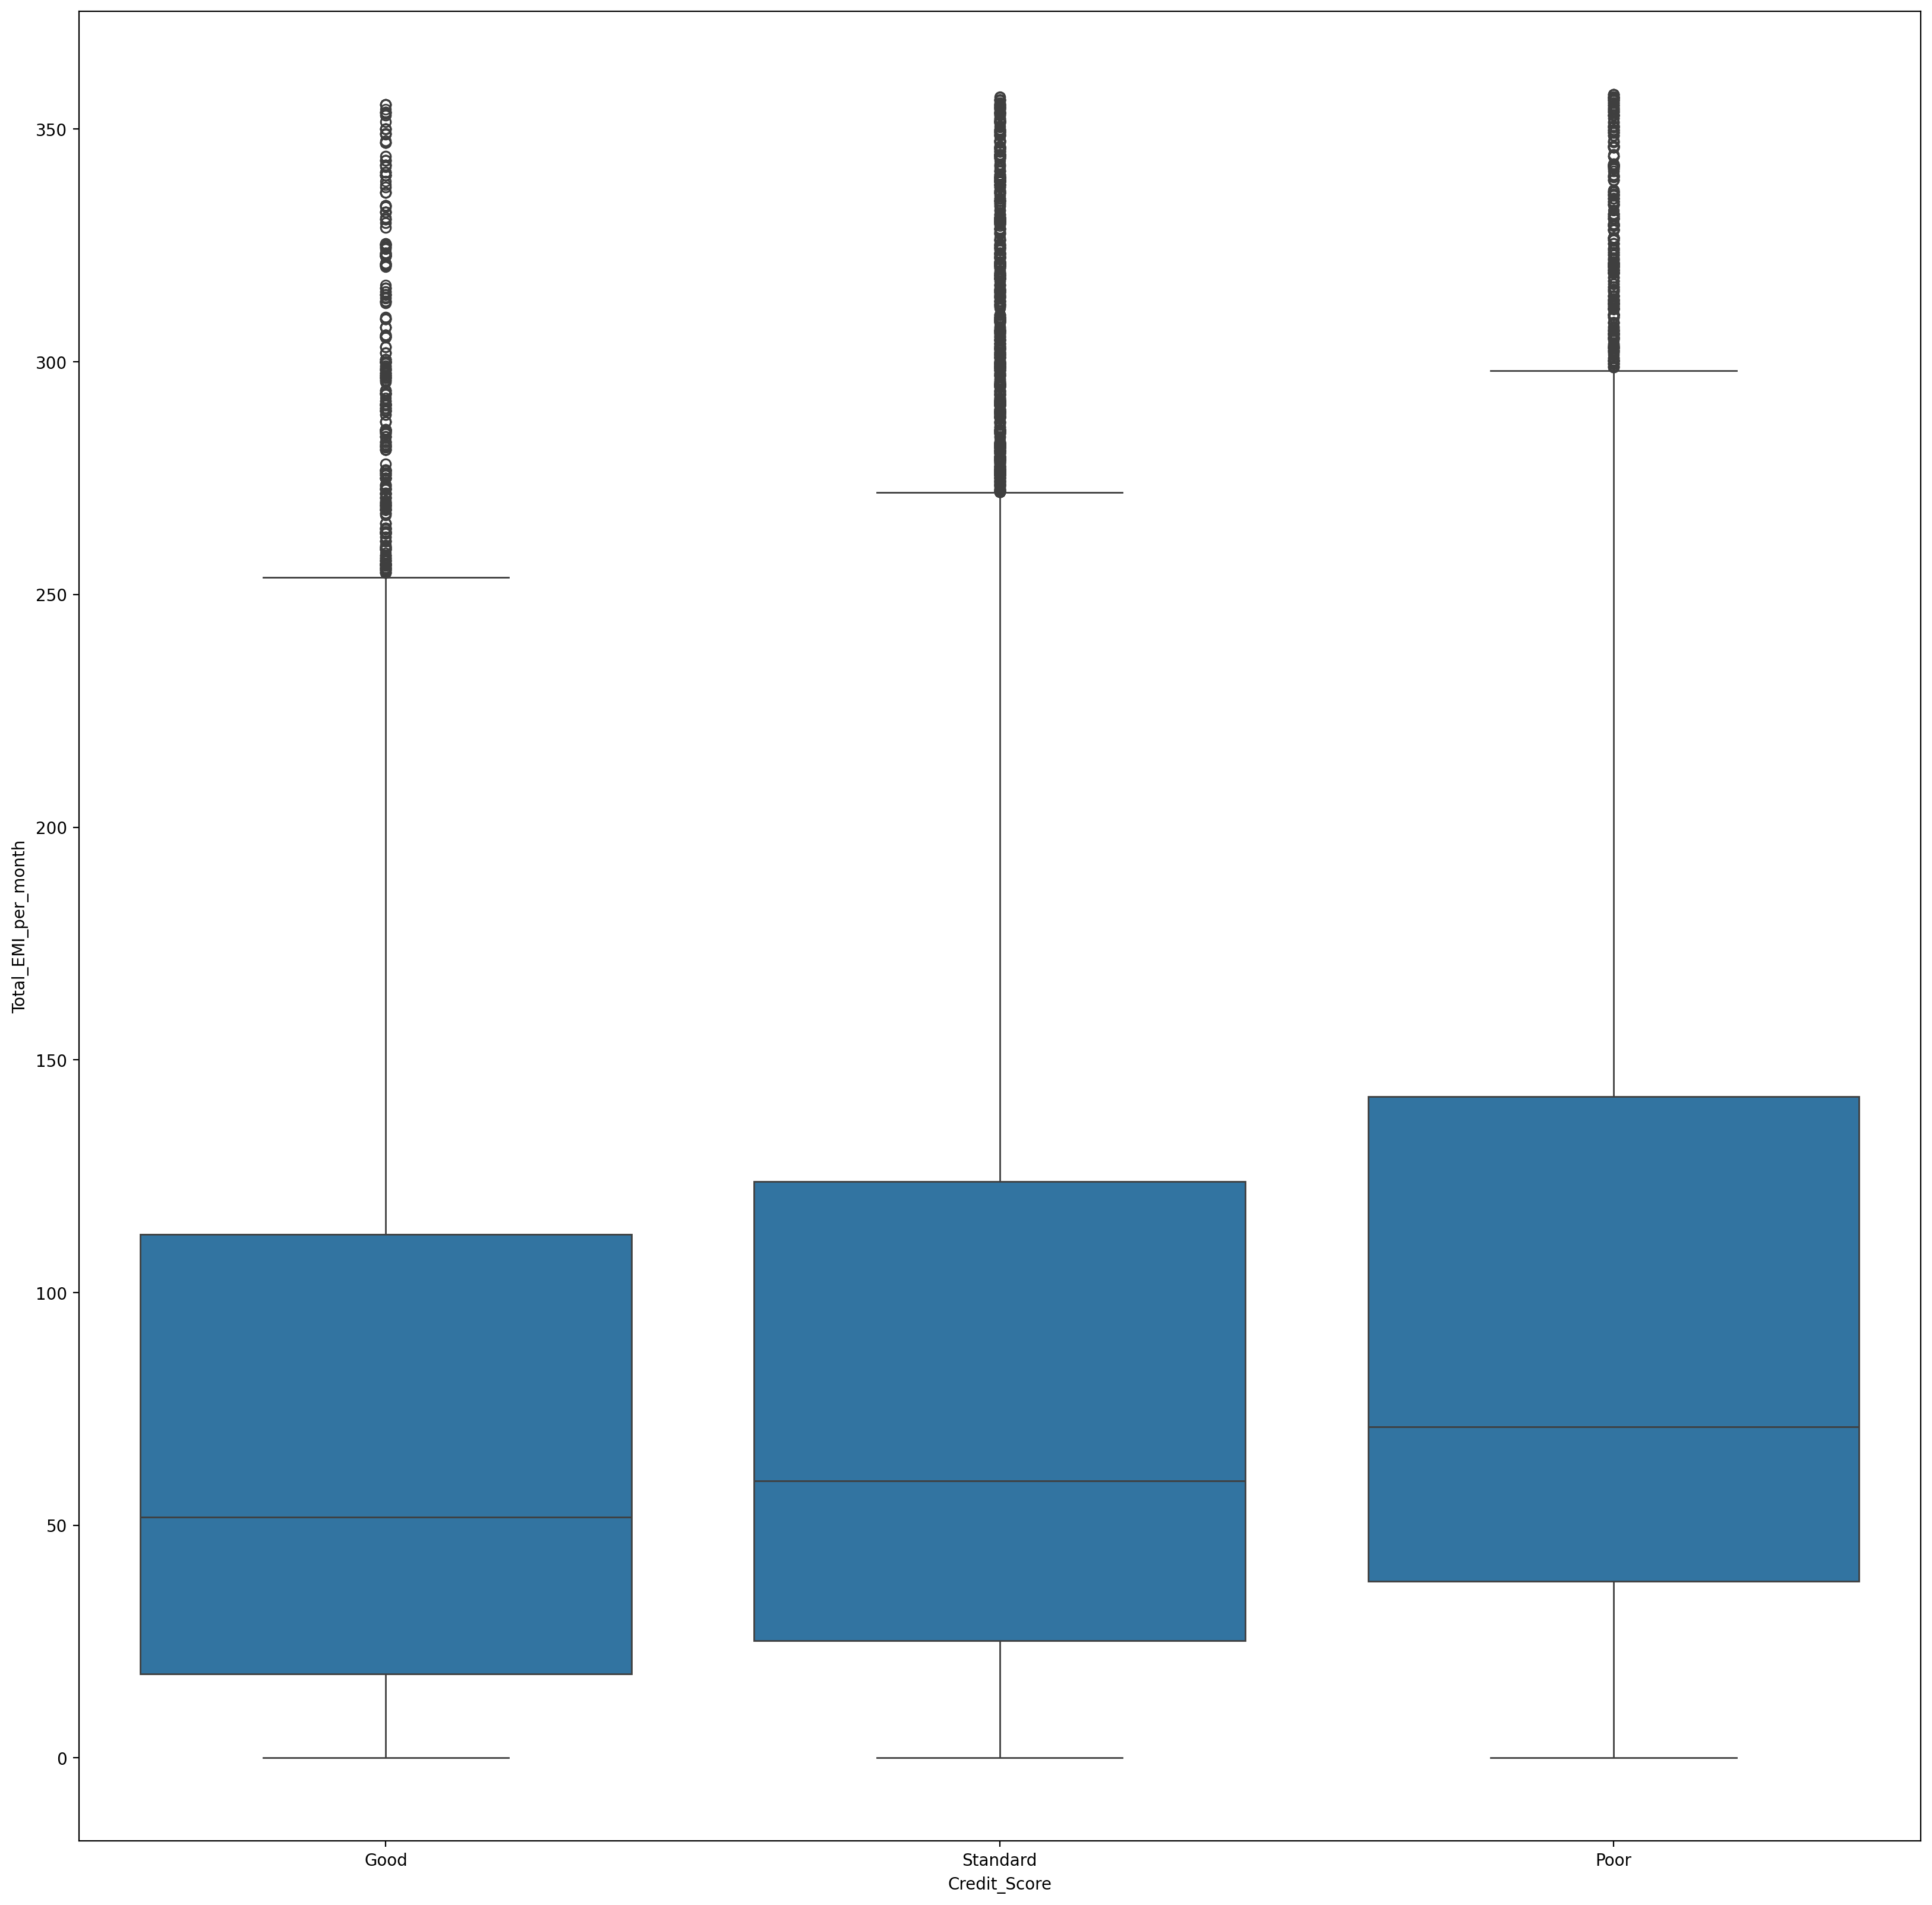

In [134]:
plt.figure(figsize = (20, 20), dpi = 200)
sns.boxplot(data = train_data, x = 'Credit_Score', y = 'Total_EMI_per_month') #So, the total Emi per month doesnt affect the credit score.

plt.show()

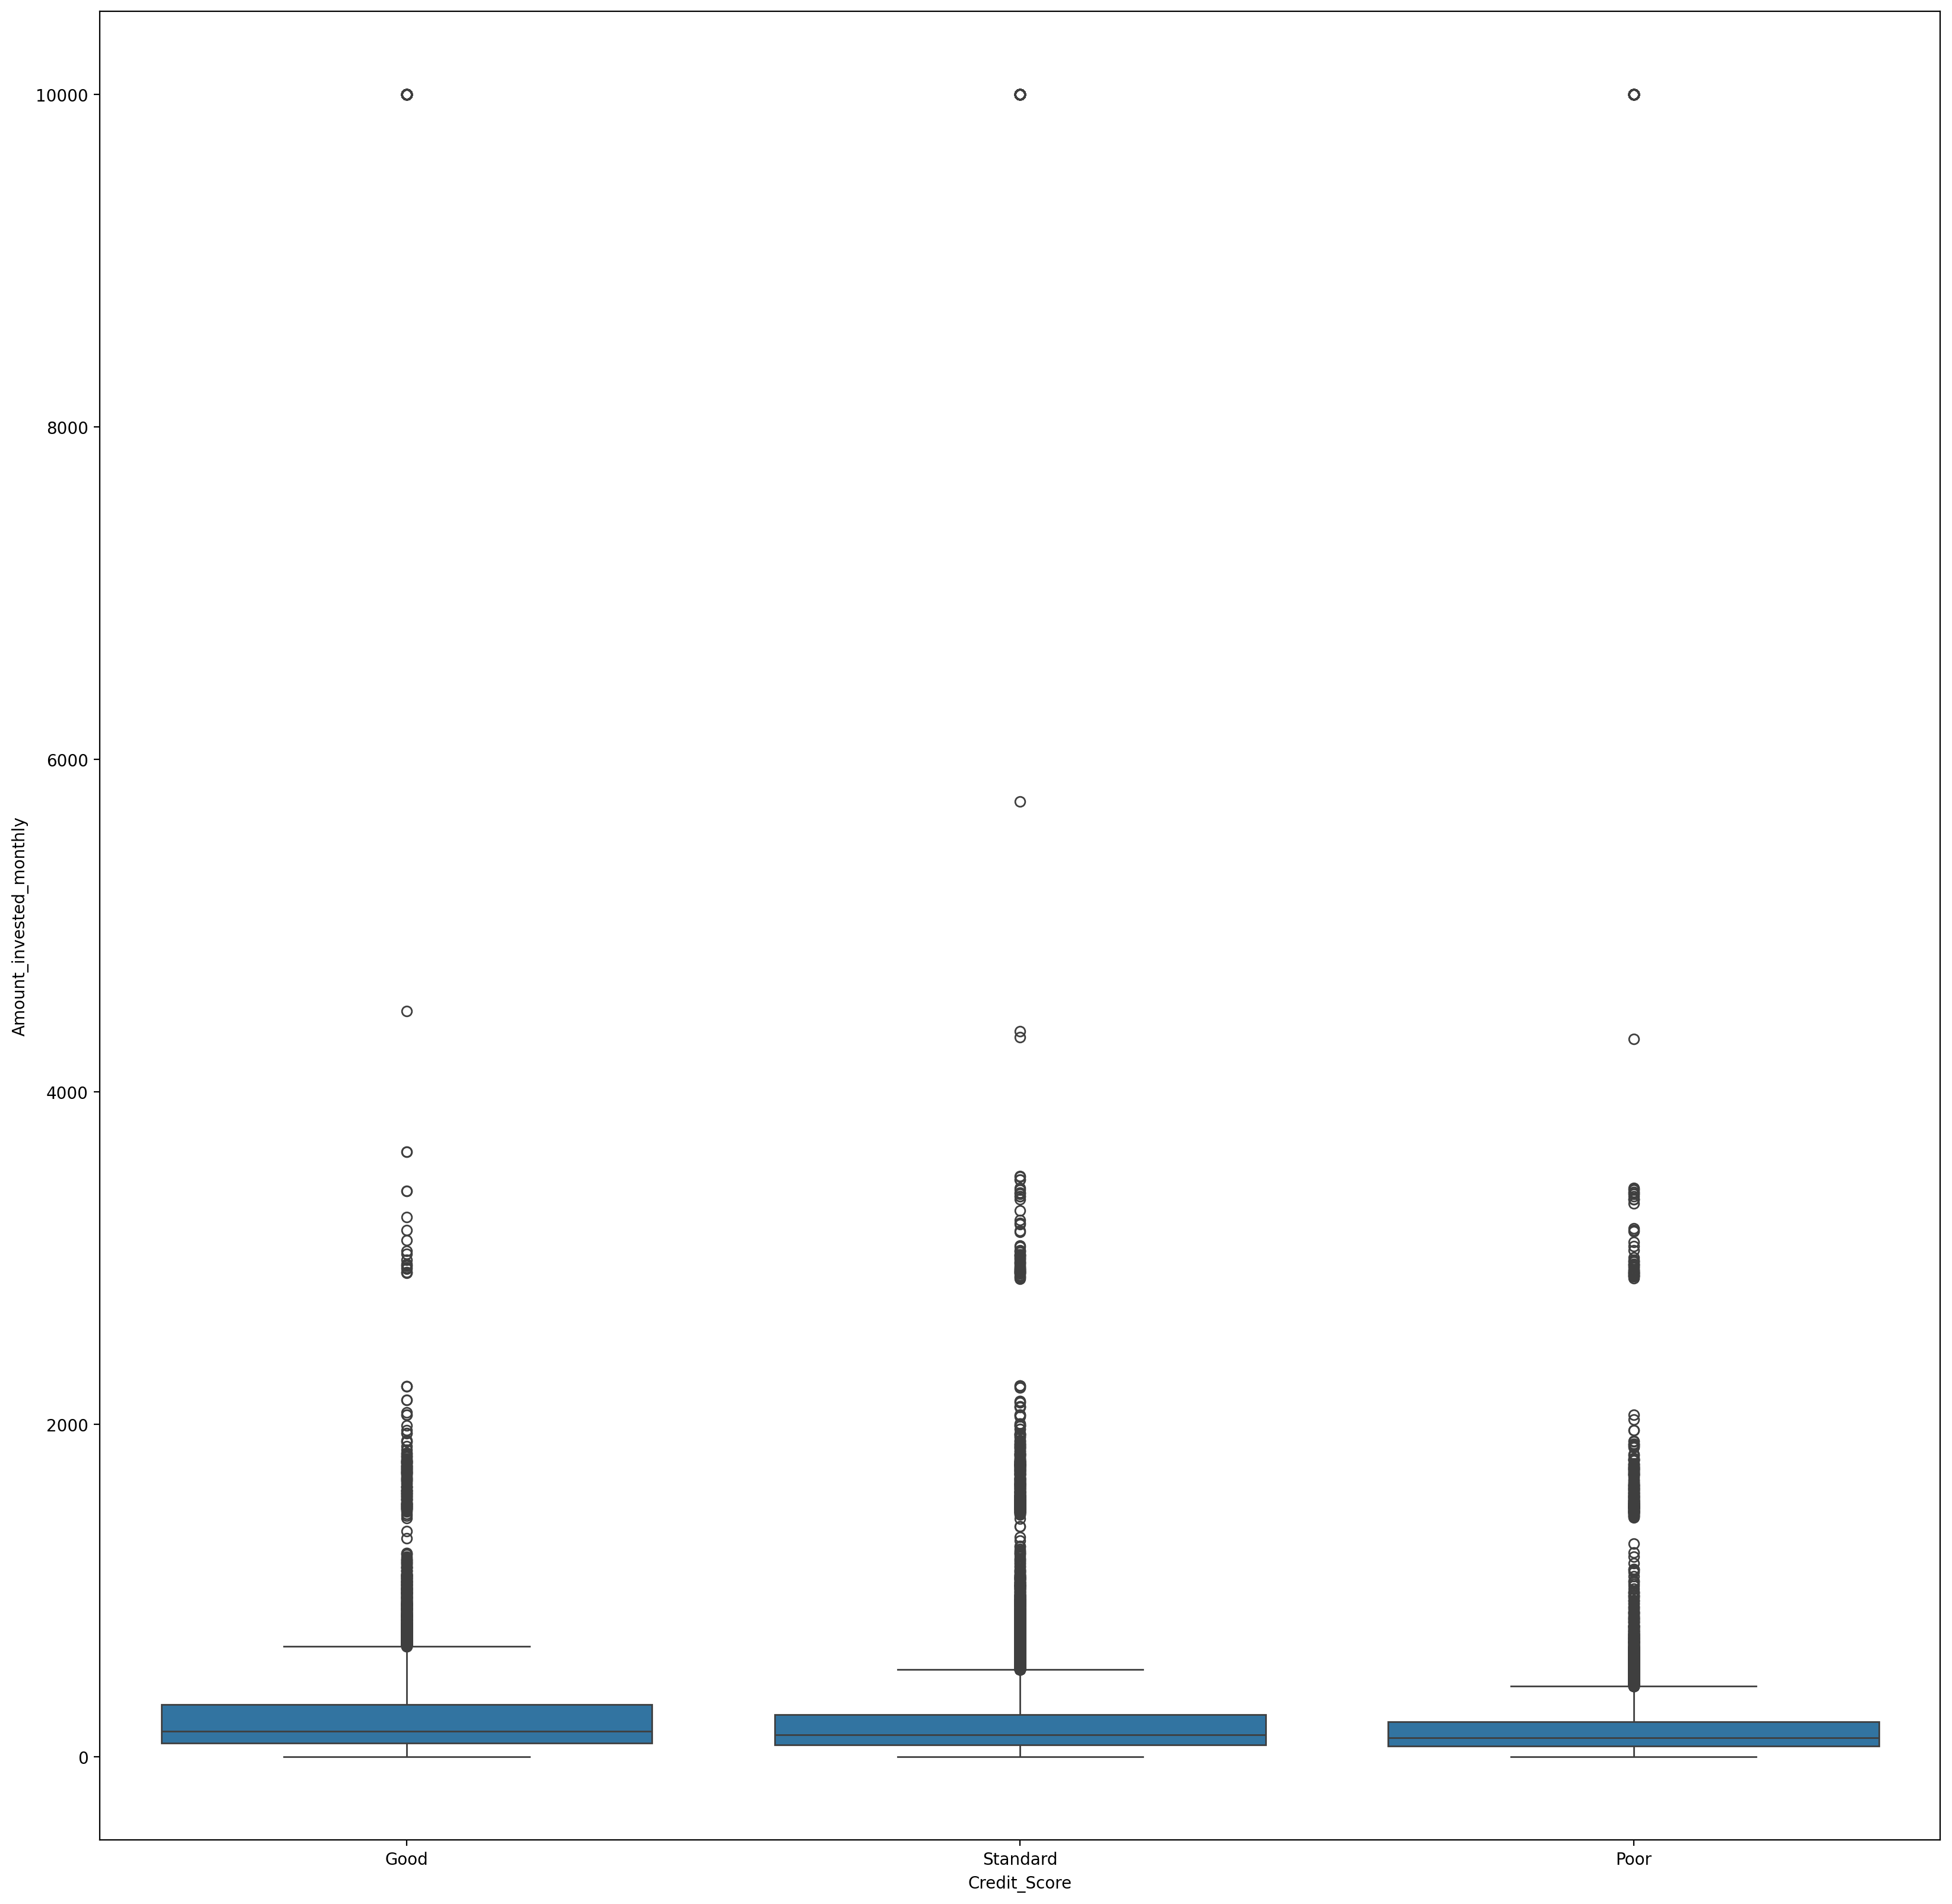

In [135]:
plt.figure(figsize = (20, 20), dpi = 200)
sns.boxplot(data = train_data,  x = 'Credit_Score', y = 'Amount_invested_monthly') #the graph shows that amount_invested monthly doesn't affect output
plt.show()

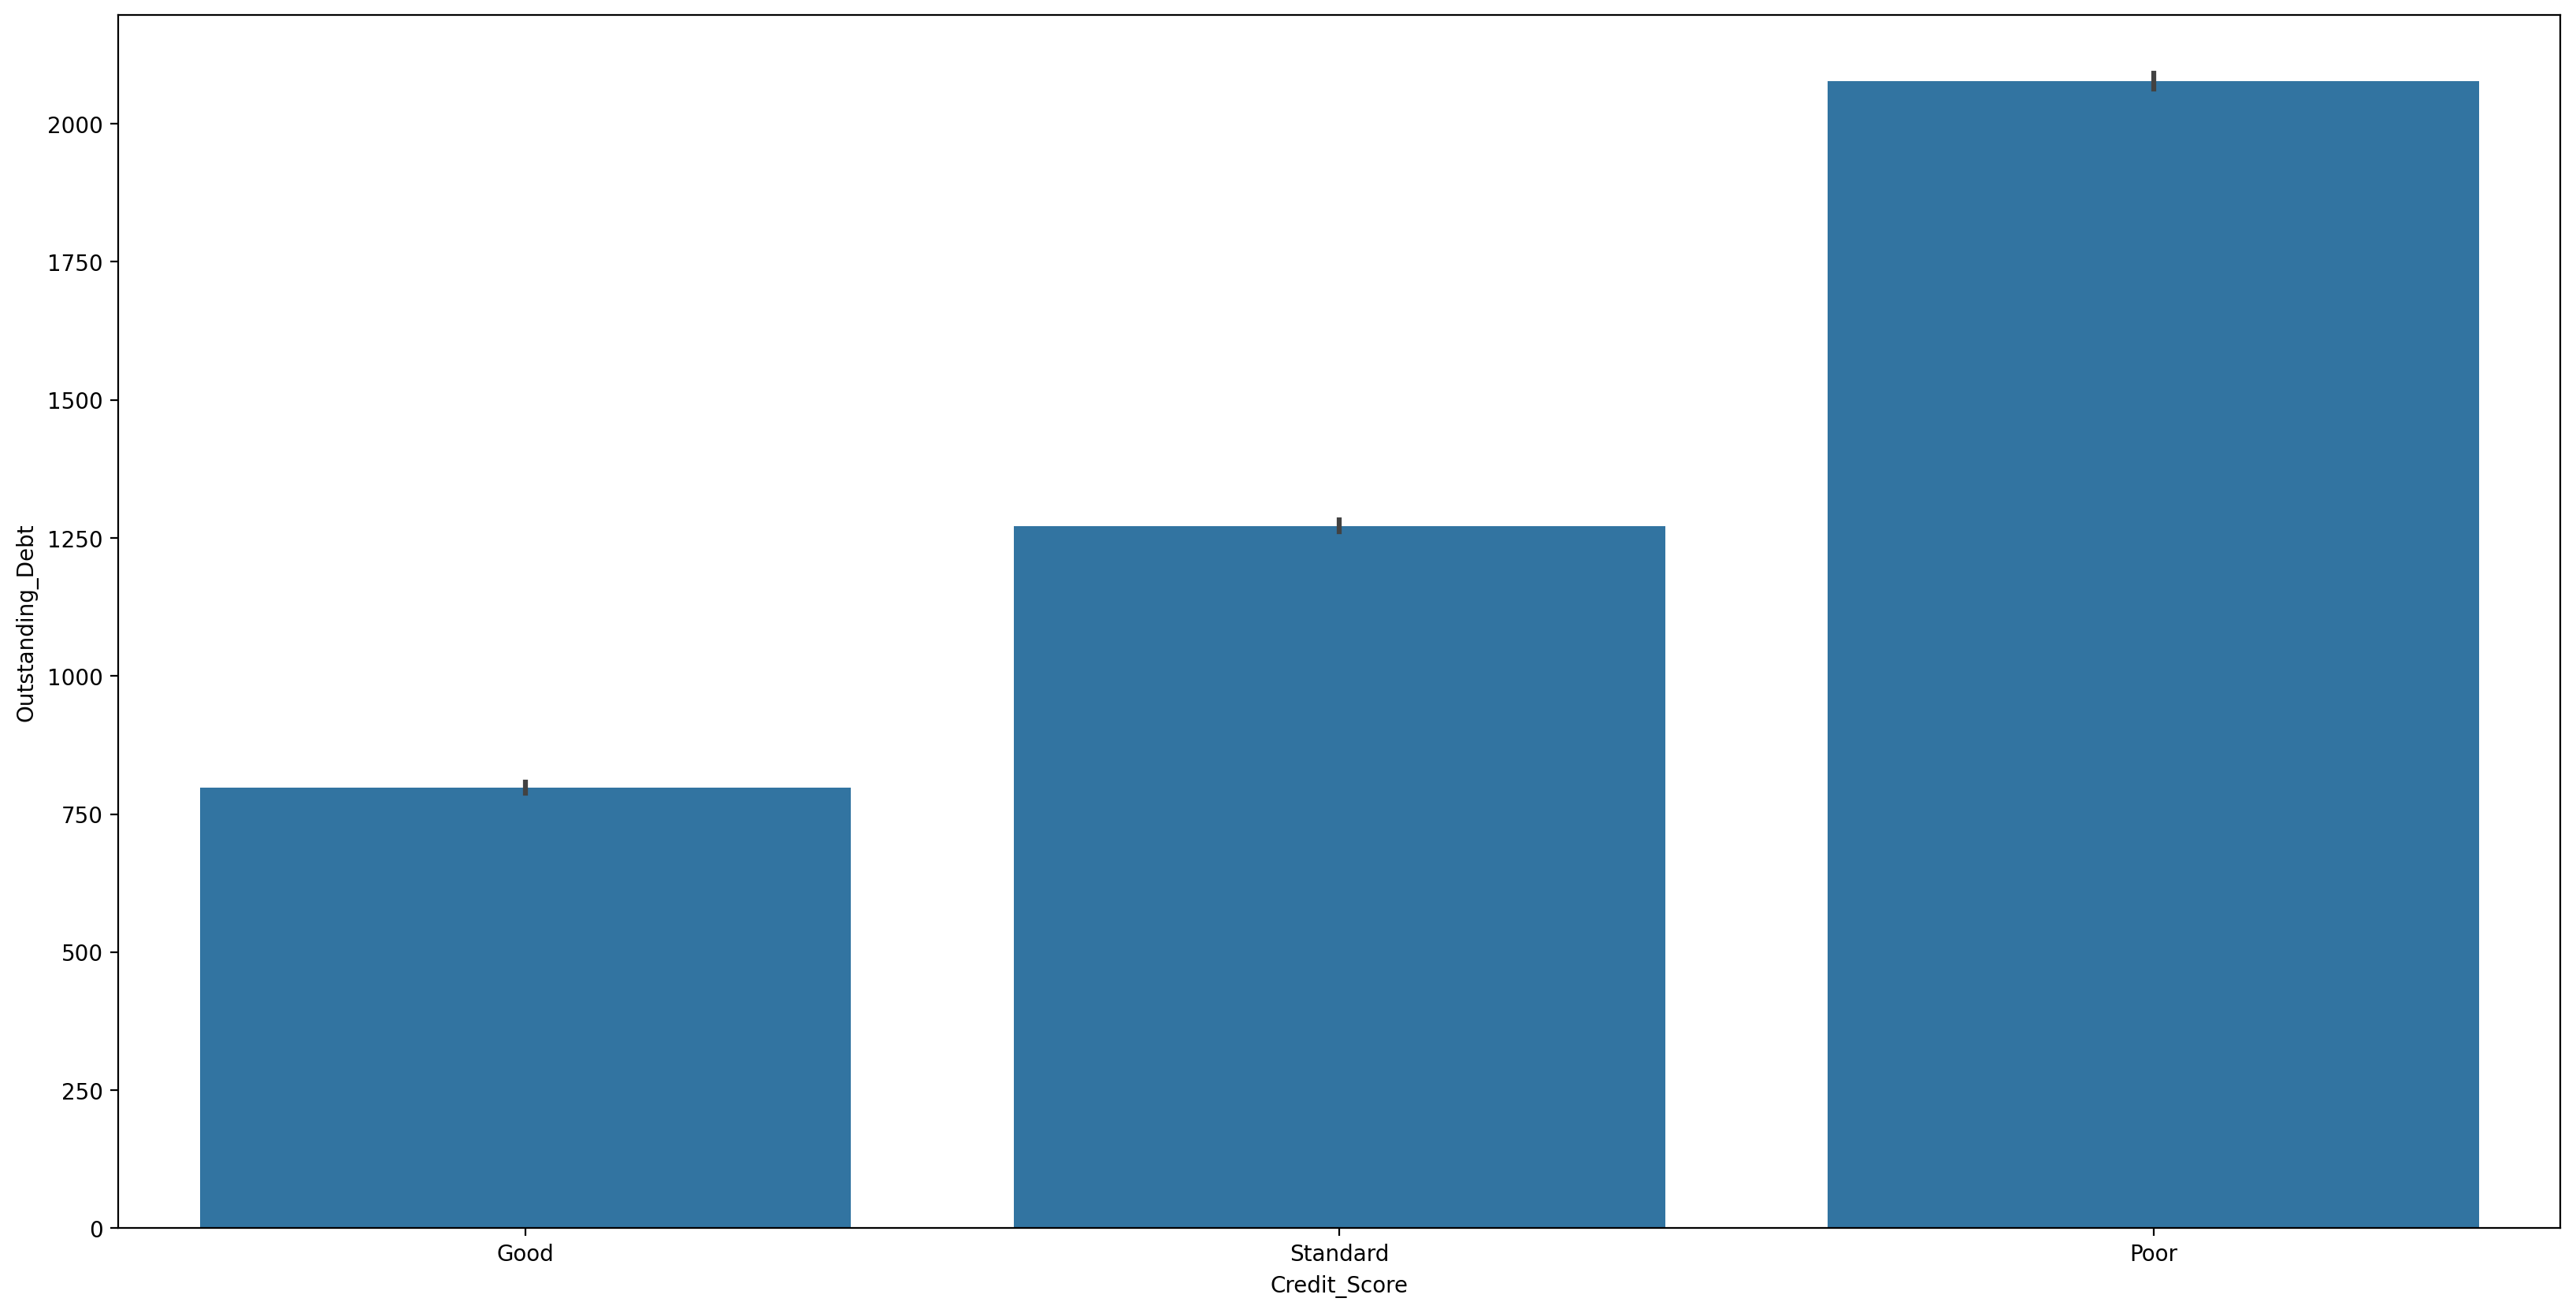

In [136]:
plt.figure(figsize = (20, 10), dpi = 200)
sns.barplot(data = train_data,  x = 'Credit_Score', y = 'Outstanding_Debt')
plt.show()

In [138]:
train_data['Credit_Mix'] = train_data['Credit_Mix'].str.replace('Bad','0')
train_data['Credit_Mix'] = train_data['Credit_Mix'].str.replace('Standard','1')
train_data['Credit_Mix'] = train_data['Credit_Mix'].str.replace('Good','2')
train_data['Credit_Mix'] = train_data['Credit_Mix'].astype(float)


train_data['Credit_Score'] = train_data['Credit_Score'].str.replace('Poor','0')
train_data['Credit_Score'] = train_data['Credit_Score'].str.replace('Standard','1')
train_data['Credit_Score'] = train_data['Credit_Score'].str.replace('Good','2')
train_data['Credit_Score'] = train_data['Credit_Score'].astype(int)

train_data['Payment_of_Min_Amount']=train_data['Payment_of_Min_Amount'].str.replace('Yes','1')
train_data['Payment_of_Min_Amount']=train_data['Payment_of_Min_Amount'].str.replace('NM','0')
train_data['Payment_of_Min_Amount']=train_data['Payment_of_Min_Amount'].str.replace('No','0')
train_data['Payment_of_Min_Amount'] = train_data['Payment_of_Min_Amount'].astype(int)


train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].str.replace('Unknown','0')
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].str.replace('Low_spent_Small_value_payments','1')
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].str.replace('Low_spent_Medium_value_payments','2')
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].str.replace('Low_spent_Large_value_payments','3')
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].str.replace('High_spent_Small_value_payments','4')
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].str.replace('High_spent_Medium_value_payments','5')
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].str.replace('High_spent_Large_value_payments','6')
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].astype(int)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
train_data['Type_of_Loan'] = le.fit_transform(train_data['Type_of_Loan'])

In [142]:
import re
def extract_year(duration):
    match = re.search(r'(\d+) Years', duration)
    if match:
        return int(match.group(1))
    else:
        return None
train_data['Credit_History_Age'] = train_data['Credit_History_Age'].apply(extract_year)

In [153]:
train_data = train_data.fillna(0)


In [154]:
drop_columns=['ID',"Name",'Customer_ID',"SSN","Type_of_Loan","Age","Month","Occupation",'Credit_Score','Amount_invested_monthly',"Total_EMI_per_month","Interest_Rate"]
train1=train_data.drop(drop_columns,axis=1)
Y=train_data['Credit_Score']
correlation_matrix = train1.corr()
print(correlation_matrix)

                          Annual_Income  Monthly_Inhand_Salary  \
Annual_Income                  1.000000               0.027665   
Monthly_Inhand_Salary          0.027665               1.000000   
Num_Bank_Accounts             -0.008827              -0.257495   
Num_Credit_Card               -0.001424              -0.208656   
Num_of_Loan                   -0.000774              -0.014535   
Delay_from_due_date           -0.008292              -0.231120   
Num_of_Delayed_Payment         0.000439               0.003073   
Changed_Credit_Limit           0.001627              -0.159712   
Num_Credit_Inquiries          -0.008009              -0.274821   
Credit_Mix                    -0.007019               0.049014   
Outstanding_Debt              -0.003212              -0.272880   
Credit_Utilization_Ratio       0.012447               0.162987   
Credit_History_Age            -0.002231               0.222965   
Payment_of_Min_Amount         -0.006254              -0.239899   
Payment_Be

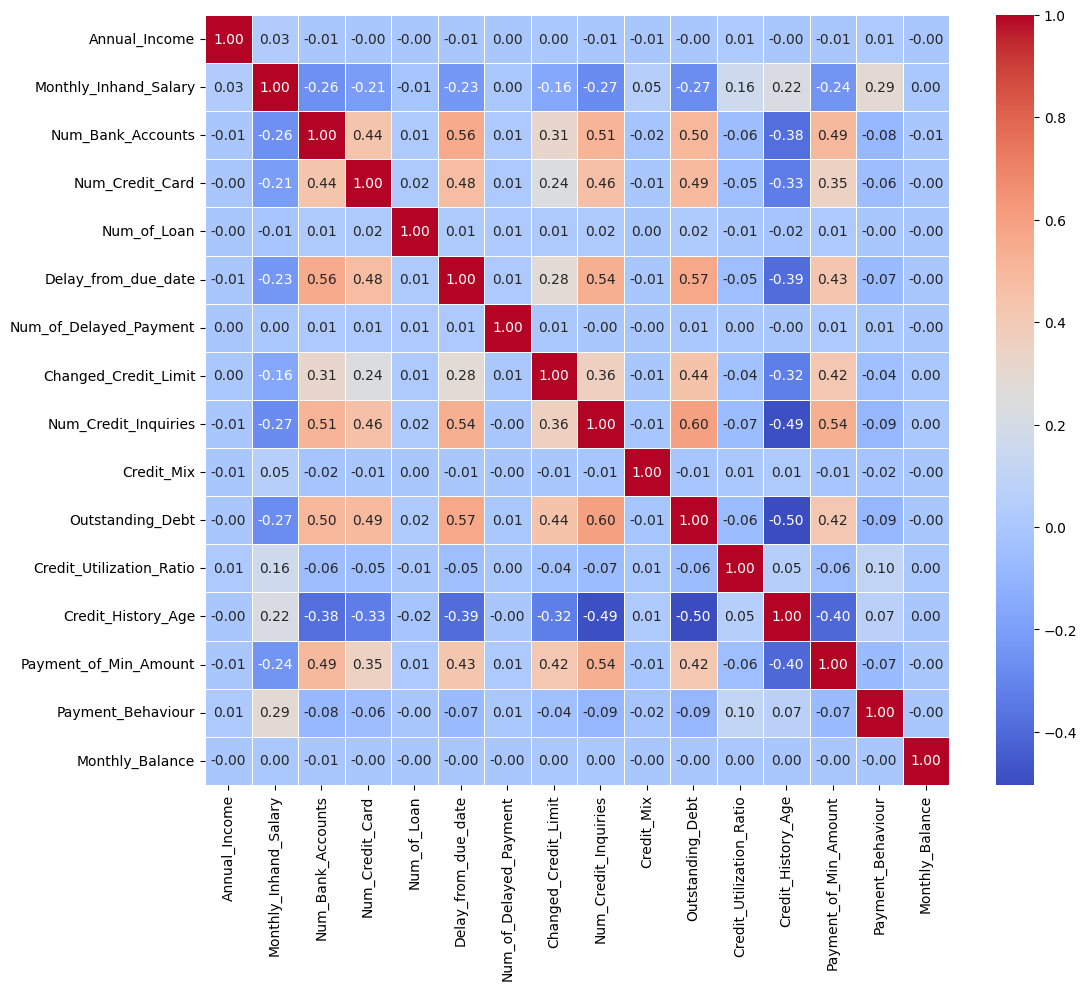

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

In [156]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train1, Y, test_size=0.3, random_state=42)

In [178]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)

# Use the same scaler to transform the test data
# X_test_scaled = scaler.transform(test_data)

# # Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the standardized training data
model.fit(x_train, y_train)

# Make predictions on the standardized test data
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.29683528736574566
Confusion Matrix:
[[ 7241     0     0]
 [13125     0     0]
 [ 4028     0     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.30      1.00      0.46      7241
           1       0.00      0.00      0.00     13125
           2       0.00      0.00      0.00      4028

    accuracy                           0.30     24394
   macro avg       0.10      0.33      0.15     24394
weighted avg       0.09      0.30      0.14     24394



C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  args=(X, target, sample_weight, l2_reg_strength, n_threads),
C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  sample_weight=sam

In [179]:
classifierMLP = MLPClassifier()
classifierMLP.fit(x_train, y_train)

MLPClassifier()

In [180]:
# Evaluate the model
y_pred = classifierMLP.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.4425268508649668


In [185]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=120, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(x_test)

C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  reset : bool


In [184]:
accuracy = accuracy_score(y_test, y_pred_gb)
print(accuracy)

0.5250881364269903
